In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo
N_total = 1000            # Población total 
S0 = 990                  # Susceptibles iniciales
I0 = 10                   # Infectados iniciales
R0 = 0                    # Recuperados iniciales

beta = 0.3                # Tasa de infección
gamma = 0.1               # Tasa de recuperación
v = 0.1                  # Tasa de vacunación

T_max = 180               # Duración de la simulación (días)
dt = 0.5                  # Paso de tiempo (días)


Crear vector de tiempo e inicializar arreglos 

In [29]:
t = np.arange(0, T_max + dt, dt)
N = len(t)

S = np.zeros(N)
I = np.zeros(N)
R = np.zeros(N)

# Condiciones iniciales
S[0] = S0
I[0] = I0
R[0] = R0

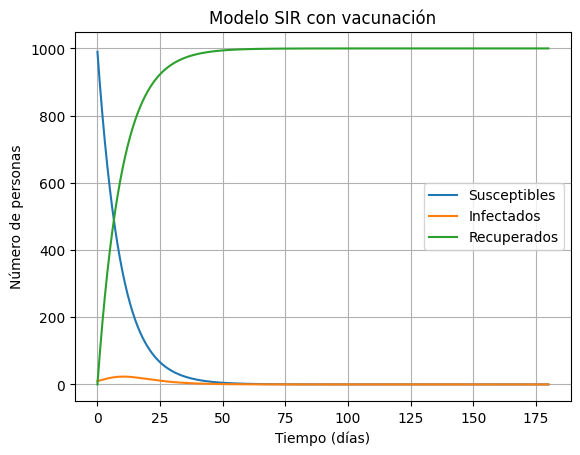

In [30]:
# Integración por método de Euler
for i in range(1, N):
    # Calcular flujos en el instante anterior
    infeccion = beta * S[i-1] * I[i-1] / N_total
    recuperacion = gamma * I[i-1]
    vacunacion = v * S[i-1]
    
    # Actualizar stocks
    S[i] = S[i-1] - infeccion * dt - vacunacion * dt
    I[i] = I[i-1] + (infeccion - recuperacion) * dt
    R[i] = R[i-1] + (recuperacion + vacunacion) * dt

# Graficar resultados
plt.plot(t, S, label='Susceptibles')
plt.plot(t, I, label='Infectados')
plt.plot(t, R, label='Recuperados')
plt.xlabel('Tiempo (días)')
plt.ylabel('Número de personas')
plt.title('Modelo SIR con vacunación')
plt.legend()
plt.grid()
plt.show()

Conclusiones
Con v=0: todos los susceptibles eventualmente se infectan y se recuperan, hasta que no hay más susceptibles disponibles y la epidemia se extingue.
Con v>0: parte de los susceptibles se convierten en recuperados directamente, y eso limita el brote